In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mu1=[1,2]
Sigma1 = [[1,0],[0,2]]

mu2=[-1,1]
Sigma2 = [[2,-1.8],[-1.8,2]]

mu3=[2,-2]
Sigma3 = [[3,1],[1,2]]

In [17]:
def getA(S):
    W, U = np.linalg.eig(S)
    return U@np.sqrt(np.diag(W))@U.T

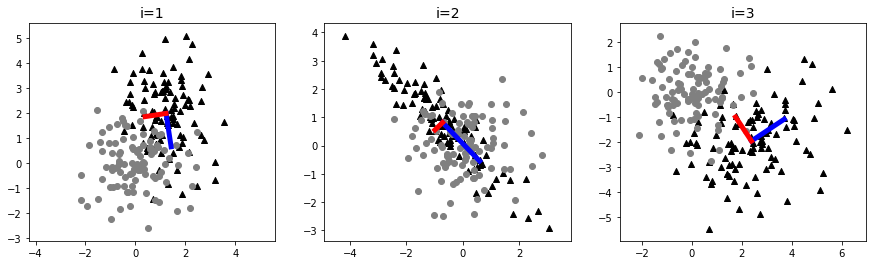

In [194]:
fig, main_ax = plt.subplots(1,3)
fig.set_figwidth(15)

for i_value,pair in enumerate([[mu1, Sigma1],[mu2, Sigma2], [mu3, Sigma3]]):
    np.random.seed(1)
    mu,S = pair
    ax = main_ax[i_value]

    A = getA(S)
    b = mu
    X_matrix = []
    for i in range(100):
        X  = A@np.random.randn(2)+b
        ax.scatter(*X, marker='^', c='black')
        X_matrix.append(X)

    mu_hat = np.array(X_matrix).sum(axis=0)/len(X_matrix)
    internal_sigma = [(x-mu_hat).reshape(2,1)@(x-mu_hat).reshape(1,2) for x in X_matrix]
    sigma_hat = np.sum(internal_sigma,axis=0)/(len(X_matrix)-1)
    W_Sigma_hat,U_Sigma_hat = np.linalg.eig(sigma_hat)

    i1 = W_Sigma_hat==max(W_Sigma_hat)
    e1 = U_Sigma_hat[:,i1].flatten()
    e1 = e1/np.sqrt(e1@e1)
    w1 = W_Sigma_hat[i1][0]
    e2 = U_Sigma_hat[:,~i1].flatten()
    e2 = e2/np.sqrt(e2@e2)
    w2 = W_Sigma_hat[~i1][0]

    ax.plot(*np.array([mu_hat,e1*np.sqrt(w1)+mu_hat]).T, lw=5, c='b')
    ax.plot(*np.array([mu_hat,e2*np.sqrt(w2)+mu_hat]).T, lw=5, c='r')

    X_tilde = np.array([[e1@(x-mu_hat)/np.sqrt(w1), e2@(x-mu_hat)/np.sqrt(w2)] for x in X_matrix]).T

    ax.scatter(X_tilde[0],X_tilde[1], marker='o', c='gray')

    ax.set_title('i={}'.format(i_value+1), fontsize=14)
    ax.axis('equal');

fig.savefig('./problem1_main.png')